In [39]:
import os
import math
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#  CREATE DATASET

In [2]:
def create_dataset(size):
    df = pd.DataFrame()
    df['size'] = np.random.choice(['big','medium','small'], size)
    df['age'] = np.random.randint(1, 50, size)
    df['team'] = np.random.choice(['red','blue','yellow','green'], size)
    df['win'] = np.random.choice(['yes','no'], size)
    dates = pd.date_range('2020-01-01', '2022-12-31')
    df['date'] = np.random.choice(dates, size)
    df['prob'] = np.random.uniform(0, 1, size)
    return df

def set_dtypes(df):
    df['size'] = df['size'].astype('category')
    df['team'] = df['team'].astype('category')
    df['age'] = df['age'].astype('int16')
    df['win'] = df['win'].map({'yes':True, 'no': False})
    df['prob'] = df['prob'].astype('float32')
    return df

In [3]:
def file_size(file_path):
    """Convert file size to human-readable output."""
    try:
        size = os.path.getsize(file_path)
        units = ['B', 'KB', 'MB', 'GB']
        i = max(0, min(len(units) - 1, int(math.floor(math.log(size, 1024)))))
        hsize = f"{round(size / (1024 ** i), 2)}{units[i]}"
    except (ValueError, FileNotFoundError):
        hsize = '0B'
    return hsize


In [4]:
df=create_dataset(1_000_000)

In [5]:
df=set_dtypes(df)

In [6]:
df.head()

,size,age,team,win,date,prob
0,small,38,yellow,False,2020-05-02,0.402611
1,small,4,green,True,2020-03-29,0.864061
2,medium,46,red,True,2022-06-17,0.424941
3,small,27,blue,False,2022-04-02,0.856769
4,small,43,yellow,True,2022-05-25,0.950643


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  category      
 1   age     1000000 non-null  int16         
 2   team    1000000 non-null  category      
 3   win     1000000 non-null  bool          
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float32       
dtypes: bool(1), category(2), datetime64[ns](1), float32(1), int16(1)
memory usage: 16.2 MB


# CSV FILE

In [8]:
to_csv_result = %timeit -o df.to_csv('test1.csv', index=False)

10.5 s ± 471 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
df_csv_result = %timeit -o pd.read_csv('test1.csv')

669 ms ± 25.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
size_csv = file_size('test1.csv')
print(f"CSV File Size: {size_csv}")

CSV File Size: 40.16MB


In [13]:
df_csv=pd.read_csv('test1.csv')
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   size    1000000 non-null  object 
 1   age     1000000 non-null  int64  
 2   team    1000000 non-null  object 
 3   win     1000000 non-null  bool   
 4   date    1000000 non-null  object 
 5   prob    1000000 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 39.1+ MB


# PICKLE FILE

In [14]:
to_pickle_result = %timeit -o df.to_pickle('test2.pickle')

17.2 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
df_pickle_result = %timeit -o pd.read_pickle('test2.pickle')

12.2 ms ± 658 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
size_pickle = file_size('test2.pickle')
print(f"Pickle File Size: {size_pickle}")

Pickle File Size: 16.21MB


In [17]:
df_pickle=pd.read_pickle('test2.pickle')
df_pickle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  category      
 1   age     1000000 non-null  int16         
 2   team    1000000 non-null  category      
 3   win     1000000 non-null  bool          
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float32       
dtypes: bool(1), category(2), datetime64[ns](1), float32(1), int16(1)
memory usage: 16.2 MB


# PARQUET FILE

In [18]:
to_parquet_result = %timeit -o df.to_parquet('test3.parquet')

189 ms ± 26.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
df_parquet_result = %timeit -o pd.read_parquet('test3.parquet')

46.8 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
size_parquet = file_size('test3.parquet')
print(f"Parquet File Size: {size_parquet}")

Parquet File Size: 7.05MB


In [22]:
df_parquet=pd.read_parquet('test3.parquet')
df_parquet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  category      
 1   age     1000000 non-null  int16         
 2   team    1000000 non-null  category      
 3   win     1000000 non-null  bool          
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float32       
dtypes: bool(1), category(2), datetime64[ns](1), float32(1), int16(1)
memory usage: 16.2 MB


# FEATHER FILE

In [23]:
to_feather_result = %timeit -o df.to_feather('test4.feather')

56 ms ± 7.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
df_feather_result = %timeit -o pd.read_feather('test4.feather')

30.9 ms ± 4.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
size_feather = file_size('test4.feather')
print(f"Feather File Size: {size_feather}")

Feather File Size: 9.78MB


In [26]:
df_feather=pd.read_feather('test4.feather')
df_feather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  category      
 1   age     1000000 non-null  int16         
 2   team    1000000 non-null  category      
 3   win     1000000 non-null  bool          
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float32       
dtypes: bool(1), category(2), datetime64[ns](1), float32(1), int16(1)
memory usage: 16.2 MB


# TIME AND SPACE ANALYSIS

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

### Analysis of the time taken to store data into different file formats

In [44]:
file_conversions = pd.DataFrame({
    'Files': ['CSV','Pickle','Parquet','Feather',],
    'Time in seconds': [ to_csv_result.average,
             to_pickle_result.average,
             to_parquet_result.average,
             to_feather_result.average] })

file_conversions.sort_values(by = 'Time in seconds', ascending = True)

,Files,Time in seconds
1,Pickle,0.017207
3,Feather,0.056008
2,Parquet,0.188803
0,CSV,10.513075


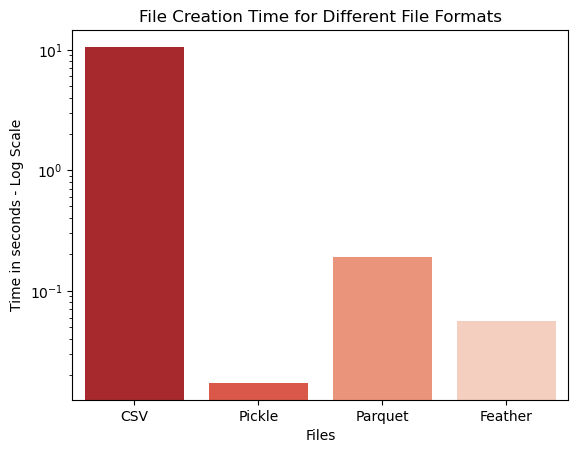

In [73]:
sns.barplot(x='Files', 
            y='Time in seconds', 
            data=file_conversions, 
           palette='Reds_r')
plt.yscale('log')
plt.ylabel('Time in seconds - Log Scale')
plt.title('File Creation Time for Different File Formats')
plt.show()

### Analysis of the time taken to retrieve data from different file formats

In [32]:
df_conversions = pd.DataFrame({
    'Files': ['CSV','Pickle','Parquet','Feather',],
    'Time in seconds': [ df_csv_result.average,
             df_pickle_result.average,
             df_parquet_result.average,
             df_feather_result.average] })

df_conversions.sort_values(by = 'Time in seconds', ascending = True)

,Files,Time in seconds
1,Pickle,0.012159
3,Feather,0.030858
2,Parquet,0.046834
0,CSV,0.668744


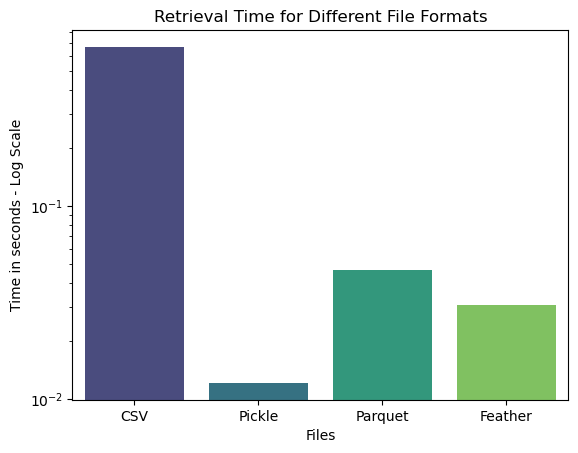

In [74]:
sns.barplot(x='Files', 
            y='Time in seconds', 
            data=df_conversions,
           palette='viridis')
plt.yscale('log')
plt.ylabel('Time in seconds - Log Scale')
plt.title('Retrieval Time for Different File Formats')
plt.show()

### Analysis of the space occupied by different file formats to store data 

In [36]:
space= pd.DataFrame({
    'Files': ['CSV','Pickle','Parquet','Feather',],
    'Size': [size_csv,
             size_pickle,
             size_parquet,
             size_feather] })

space.sort_values(by = 'Size', ascending = False)

,Files,Size
3,Feather,9.78MB
2,Parquet,7.05MB
0,CSV,40.16MB
1,Pickle,16.21MB


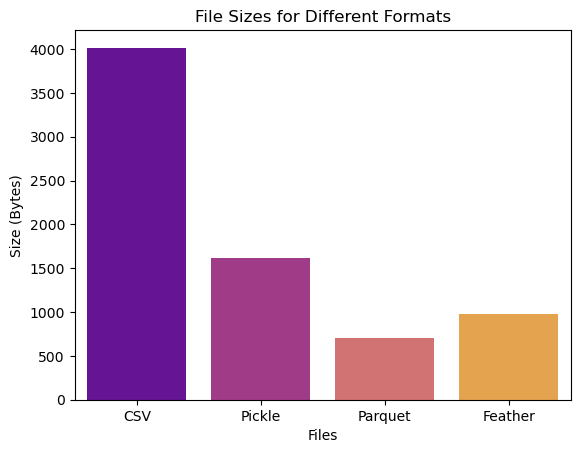

In [77]:
sns.barplot(x='Files', 
            y=space['Size'].apply(lambda x: int(''.join(filter(str.isdigit, x)))), 
            data=space, 
            palette='plasma')
plt.ylabel('Size (Bytes)')
plt.title('File Sizes for Different Formats')
plt.show()